In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv("~/neuefische/da-EDA_project_fork/data/muesli_raw_data_supersets.csv", sep=";")

In [114]:
df

,Order ID,Order Date,Day of Week,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,...,Sub-Category,Product ID,Sales,Quantity,Discount,Profit,Ready to Ship Date,Pickup Date,On Truck Scan Date,Arrival Scan Date
0,CA-2019-121755,16/1/2019,Wednesday,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741,NaN,NaN,23/01/2019,NaN
1,CA-2019-118255,11/3/2019,Monday,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,...,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714,NaN,NaN,13/03/2019,NaN
2,CA-2019-169194,20/6/2019,Thursday,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,...,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500,NaN,NaN,26/06/2019,NaN
3,CA-2019-111682,17/6/2019,Monday,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,...,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000,NaN,NaN,19/06/2019,NaN
4,CA-2018-135545,24/11/2018,Saturday,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,...,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,US-2019-115441,25/7/2019,Thursday,Second Class,SH-19975,Sally Hughsby,Sales,United States,Milwaukee,Wisconsin,...,With Nuts,FUR-CH-10004626,403.56,4,0.0,96.8544,NaN,NaN,31/07/2019,NaN
9990,US-2018-129007,13/9/2018,Thursday,First Class,KD-16615,Ken Dana,Sales,United States,Anaheim,California,...,With Nuts,FUR-CH-10000155,717.72,3,0.2,72.0000,NaN,NaN,NaN,NaN
9991,CA-2018-132388,10/10/2018,Wednesday,First Class,KN-16390,Katherine Nockton,Sales,United States,Santa Barbara,California,...,With Nuts,FUR-CH-10001714,362.00,3,0.2,-54.3204,NaN,NaN,NaN,NaN
9992,CA-2019-149272,15/3/2019,Friday,Standard Class,MY-18295,Muhammed Yedwab,Sales,United States,Bryan,Texas,...,With Nuts,FUR-CH-10000863,528.43,5,0.3,-143.0000,NaN,NaN,20/03/2019,NaN


In [115]:
df.columns = [c.lower() for c in df.columns] #make everything lower case
df.columns = [c.replace(' ', '_') for c in df.columns] #replace spaces with underscores
df.columns = [c.replace('/', '_') for c in df.columns] #replace symbol with underscores
df.columns = [c.replace('-', '_') for c in df.columns] #replace symbol with underscores

In [116]:
df

,order_id,order_date,day_of_week,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,...,sub_category,product_id,sales,quantity,discount,profit,ready_to_ship_date,pickup_date,on_truck_scan_date,arrival_scan_date
0,CA-2019-121755,16/1/2019,Wednesday,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741,NaN,NaN,23/01/2019,NaN
1,CA-2019-118255,11/3/2019,Monday,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,...,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714,NaN,NaN,13/03/2019,NaN
2,CA-2019-169194,20/6/2019,Thursday,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,...,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500,NaN,NaN,26/06/2019,NaN
3,CA-2019-111682,17/6/2019,Monday,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,...,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000,NaN,NaN,19/06/2019,NaN
4,CA-2018-135545,24/11/2018,Saturday,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,...,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,US-2019-115441,25/7/2019,Thursday,Second Class,SH-19975,Sally Hughsby,Sales,United States,Milwaukee,Wisconsin,...,With Nuts,FUR-CH-10004626,403.56,4,0.0,96.8544,NaN,NaN,31/07/2019,NaN
9990,US-2018-129007,13/9/2018,Thursday,First Class,KD-16615,Ken Dana,Sales,United States,Anaheim,California,...,With Nuts,FUR-CH-10000155,717.72,3,0.2,72.0000,NaN,NaN,NaN,NaN
9991,CA-2018-132388,10/10/2018,Wednesday,First Class,KN-16390,Katherine Nockton,Sales,United States,Santa Barbara,California,...,With Nuts,FUR-CH-10001714,362.00,3,0.2,-54.3204,NaN,NaN,NaN,NaN
9992,CA-2019-149272,15/3/2019,Friday,Standard Class,MY-18295,Muhammed Yedwab,Sales,United States,Bryan,Texas,...,With Nuts,FUR-CH-10000863,528.43,5,0.3,-143.0000,NaN,NaN,20/03/2019,NaN


In [117]:
df.shape #check for the sum of null values per variable/column: if not same as row number: do something about it

(9994, 23)

In [118]:
df.notnull().sum()

order_id              9994
order_date            9994
day_of_week           9994
ship_mode             9994
customer_id           9994
customer_name         9994
origin_channel        9994
country_region        9994
city                  9994
state                 9994
postal_code           9983
region                9994
category              9994
sub_category          9994
product_id            9994
sales                 9994
quantity              9994
discount              9994
profit                9994
ready_to_ship_date     418
pickup_date            418
on_truck_scan_date    5899
arrival_scan_date      668
dtype: int64

In [119]:
missing_postals = df.query("postal_code.isnull() == True") #find the missing values in data set using query
missing_postals

,order_id,order_date,day_of_week,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,...,sub_category,product_id,sales,quantity,discount,profit,ready_to_ship_date,pickup_date,on_truck_scan_date,arrival_scan_date
173,CA-2020-104066,5/12/2020,Saturday,Standard Class,QJ-19255,Quincy Jones,Sales,United States,Burlington,Vermont,...,Gluten Free,TEC-AC-10001013,205.03,7,0.0,67.6599,NaN,NaN,09/12/2020,NaN
710,US-2019-165505,23/1/2019,Wednesday,Standard Class,CB-12535,Claudia Bergmann,Sales,United States,Burlington,Vermont,...,Gluten Free,TEC-AC-10002926,99.98,2,0.0,42.9914,NaN,NaN,30/01/2019,NaN
1732,US-2020-127292,19/1/2020,Sunday,Standard Class,RM-19375,Raymond Messe,Email,United States,Burlington,Vermont,...,Mega Protein,OFF-AP-10000828,542.94,3,0.0,152.0232,NaN,NaN,27/01/2020,NaN
3408,US-2020-127292,19/1/2020,Sunday,Standard Class,RM-19375,Raymond Messe,Email,United States,Burlington,Vermont,...,Nuts and more,OFF-PA-10000157,79.92,4,0.0,37.5624,NaN,NaN,27/01/2020,NaN
3409,US-2020-127292,19/1/2020,Sunday,Standard Class,RM-19375,Raymond Messe,Email,United States,Burlington,Vermont,...,Nuts and more,OFF-PA-10001970,12.28,1,0.0,5.7716,NaN,NaN,27/01/2020,NaN
4279,US-2019-150140,6/4/2019,Saturday,Standard Class,VM-21685,Valerie Mitchum,Facebook,United States,Burlington,Vermont,...,Only Oats,TEC-PH-10002555,1294.75,5,0.0,337.0000,NaN,NaN,15/04/2019,NaN
4694,US-2020-127292,19/1/2020,Sunday,Standard Class,RM-19375,Raymond Messe,Email,United States,Burlington,Vermont,...,Power Clean Fibre Boost,OFF-EN-10001509,2.04,1,0.0,0.9588,NaN,NaN,27/01/2020,NaN
5490,US-2019-165505,23/1/2019,Wednesday,Standard Class,CB-12535,Claudia Bergmann,Sales,United States,Burlington,Vermont,...,Steel Cut,OFF-ST-10001526,1564.29,13,0.0,406.7154,NaN,NaN,30/01/2019,NaN
7802,US-2019-165505,23/1/2019,Wednesday,Standard Class,CB-12535,Claudia Bergmann,Sales,United States,Burlington,Vermont,...,Super Mega Protein,OFF-AR-10003477,8.04,6,0.0,2.7336,NaN,NaN,30/01/2019,NaN
8415,CA-2018-117086,8/11/2018,Thursday,Standard Class,QJ-19255,Quincy Jones,Sales,United States,Burlington,Vermont,...,With Fruit,FUR-BO-10004834,4404.90,5,0.0,1013.1270,NaN,NaN,NaN,NaN


In [120]:
df["postal_code"].fillna(value = "05401", #Replace Postal Code with random postal code from the city of Burlington, Vermont
          inplace = True)

In [121]:
df.isnull().sum()

order_id                 0
order_date               0
day_of_week              0
ship_mode                0
customer_id              0
customer_name            0
origin_channel           0
country_region           0
city                     0
state                    0
postal_code              0
region                   0
category                 0
sub_category             0
product_id               0
sales                    0
quantity                 0
discount                 0
profit                   0
ready_to_ship_date    9576
pickup_date           9576
on_truck_scan_date    4095
arrival_scan_date     9326
dtype: int64

In [122]:
df

,order_id,order_date,day_of_week,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,...,sub_category,product_id,sales,quantity,discount,profit,ready_to_ship_date,pickup_date,on_truck_scan_date,arrival_scan_date
0,CA-2019-121755,16/1/2019,Wednesday,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741,NaN,NaN,23/01/2019,NaN
1,CA-2019-118255,11/3/2019,Monday,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,...,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714,NaN,NaN,13/03/2019,NaN
2,CA-2019-169194,20/6/2019,Thursday,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,...,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500,NaN,NaN,26/06/2019,NaN
3,CA-2019-111682,17/6/2019,Monday,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,...,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000,NaN,NaN,19/06/2019,NaN
4,CA-2018-135545,24/11/2018,Saturday,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,...,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,US-2019-115441,25/7/2019,Thursday,Second Class,SH-19975,Sally Hughsby,Sales,United States,Milwaukee,Wisconsin,...,With Nuts,FUR-CH-10004626,403.56,4,0.0,96.8544,NaN,NaN,31/07/2019,NaN
9990,US-2018-129007,13/9/2018,Thursday,First Class,KD-16615,Ken Dana,Sales,United States,Anaheim,California,...,With Nuts,FUR-CH-10000155,717.72,3,0.2,72.0000,NaN,NaN,NaN,NaN
9991,CA-2018-132388,10/10/2018,Wednesday,First Class,KN-16390,Katherine Nockton,Sales,United States,Santa Barbara,California,...,With Nuts,FUR-CH-10001714,362.00,3,0.2,-54.3204,NaN,NaN,NaN,NaN
9992,CA-2019-149272,15/3/2019,Friday,Standard Class,MY-18295,Muhammed Yedwab,Sales,United States,Bryan,Texas,...,With Nuts,FUR-CH-10000863,528.43,5,0.3,-143.0000,NaN,NaN,20/03/2019,NaN


In [123]:
df.info(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            9994 non-null   object 
 1   order_date          9994 non-null   object 
 2   day_of_week         9994 non-null   object 
 3   ship_mode           9994 non-null   object 
 4   customer_id         9994 non-null   object 
 5   customer_name       9994 non-null   object 
 6   origin_channel      9994 non-null   object 
 7   country_region      9994 non-null   object 
 8   city                9994 non-null   object 
 9   state               9994 non-null   object 
 10  postal_code         9994 non-null   object 
 11  region              9994 non-null   object 
 12  category            9994 non-null   object 
 13  sub_category        9994 non-null   object 
 14  product_id          9994 non-null   object 
 15  sales               9994 non-null   float64
 16  quanti

In [124]:
df['order_date'] = pd.to_datetime(df['order_date'], format = "%d/%m/%Y") # orginal format was 16/1/2019 as string, now becomes date 16:01:2019
df['arrival_scan_date'] = pd.to_datetime(df['arrival_scan_date'], format = "%d/%m/%Y")
df['order_date'] = pd.to_datetime(df['order_date'], format = "%d/%m/%Y")
df['on_truck_scan_date'] = pd.to_datetime(df['on_truck_scan_date'], format = "%d/%m/%Y")
df['ready_to_ship_date'] = pd.to_datetime(df['ready_to_ship_date'], format = "%d/%m/%Y")
df['pickup_date'] = pd.to_datetime(df['pickup_date'], format = "%d/%m/%Y")

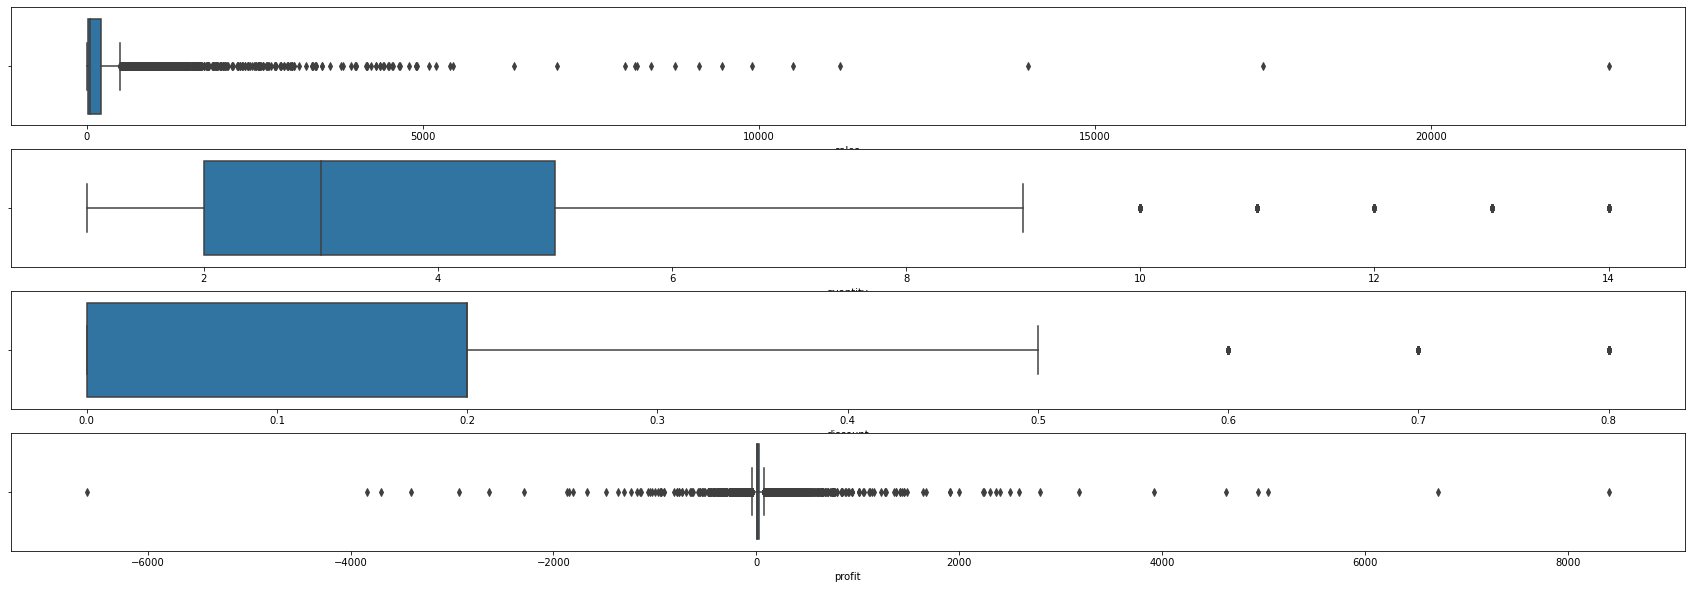

In [125]:
fig, axes = plt.subplots(4, 1, figsize=(30,10)) # check outliers in numerical variables, which only exist in df1 as the table above shows (data types)

#create chart in each subplot
sns.boxplot(x=df["sales"], ax=axes[0])
sns.boxplot(x=df["quantity"], ax=axes[1])
sns.boxplot(x=df["discount"], ax=axes[2])
sns.boxplot(x=df["profit"], ax=axes[3]);

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            9994 non-null   object        
 1   order_date          9994 non-null   datetime64[ns]
 2   day_of_week         9994 non-null   object        
 3   ship_mode           9994 non-null   object        
 4   customer_id         9994 non-null   object        
 5   customer_name       9994 non-null   object        
 6   origin_channel      9994 non-null   object        
 7   country_region      9994 non-null   object        
 8   city                9994 non-null   object        
 9   state               9994 non-null   object        
 10  postal_code         9994 non-null   object        
 11  region              9994 non-null   object        
 12  category            9994 non-null   object        
 13  sub_category        9994 non-null   object      

order_id       
order_date          
day_of_week    
ship_mode           
customer_id             
customer_name
origin_channel        
country_region
city          
state         
postal_code   
region        
category            
sub_category        
product_id          
sales               
quantity            
discount            
profit              
ready_to_ship_date  
pickup_date         
on_truck_scan_date\
arrival_scan_date   

<img src="0_0.png" width=300 >

In [127]:
# Average Time per Delivery = Mean of Arrival Scan Date - Order Date
# Average Profit Margin = Mean of Profit
# Revenue = Sales
# Average Basket Size = Mean Quantity of Items
# Average Time of Processing = Ready to Ship Date - Order Date
# Delay in Pickup = Pick Up Date - Ready to Ship Date
# On Time Delivery = arrival scan date - On truck scan

In [191]:
df.eval("time_per_delivery = arrival_scan_date - order_date", inplace = True)
df.time_per_delivery.describe()

count                           668
mean     10 days 21:16:10.059880239
std       2 days 21:04:34.269950730
min                 3 days 00:00:00
25%                 9 days 00:00:00
50%                12 days 00:00:00
75%                13 days 00:00:00
max                17 days 00:00:00
Name: time_per_delivery, dtype: object

In [129]:
df.eval("time_of_processing = ready_to_ship_date - order_date", inplace = True)
df.time_of_processing.describe()

count                          418
mean     4 days 03:47:22.105263157
std      1 days 22:47:56.623622708
min                0 days 00:00:00
25%                3 days 00:00:00
50%                5 days 00:00:00
75%                6 days 00:00:00
max                8 days 00:00:00
Name: time_of_processing, dtype: object

In [130]:
df.eval("pickup_delay = pickup_date - ready_to_ship_date", inplace = True)
df.pickup_delay.describe()

count                          418
mean     1 days 15:26:41.913875598
std      0 days 23:12:24.026769113
min                0 days 00:00:00
25%                1 days 00:00:00
50%                2 days 00:00:00
75%                2 days 00:00:00
max                3 days 00:00:00
Name: pickup_delay, dtype: object

In [131]:
df.eval("shipping_time = arrival_scan_date - on_truck_scan_date", inplace = True)
df.shipping_time.describe()

count                          668
mean     4 days 13:28:22.994011976
std      1 days 05:00:33.077887896
min                1 days 00:00:00
25%                4 days 00:00:00
50%                5 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: shipping_time, dtype: object

In [154]:
df.eval("costs = sales - profit", inplace=True)
df.costs.describe()

count     9994.000000
mean       201.201259
std        550.840433
min          0.000000
25%         12.702625
50%         41.704400
75%        182.241800
max      24449.558400
Name: costs, dtype: float64

In [158]:
df.eval("margin = profit / sales", inplace=True)
df.margin.describe()

count    9994.000000
mean            -inf
std              NaN
min             -inf
25%         0.072505
50%         0.270000
75%         0.362880
max         1.000000
Name: margin, dtype: float64

In [166]:
df["order_year"] = df["order_date"].dt.year
df["order_month"] = df["order_date"].dt.month

In [167]:
df.columns

Index(['order_id', 'order_date', 'day_of_week', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country_region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub_category', 'product_id',
       'sales', 'quantity', 'discount', 'profit', 'ready_to_ship_date',
       'pickup_date', 'on_truck_scan_date', 'arrival_scan_date',
       'time_per_delivery', 'time_of_processing', 'pickup_delay',
       'shipping_time', 'costs', 'margin', 'order_year', 'order_month'],
      dtype='object')

In [ ]:
# tried to boxplot new variables but could not transform to numerics type, df['date'].astype(int).astype(float)

<img src="0_0.png" width=300 >

In [189]:
table_processing = pd.pivot_table(df,
                values=['time_of_processing'], 
                index=['day_of_week'],
                aggfunc={'time_of_processing': 'mean'})
table_processing

,time_of_processing
day_of_week,
Friday,4 days 03:34:03.243243243
Monday,3 days 19:08:21.265822784
Saturday,4 days 12:24:49.655172413
Sunday,6 days 09:36:00
Thursday,4 days 00:21:10.588235294
Tuesday,4 days 13:48:00
Wednesday,3 days 23:07:57.108433734


In [151]:
table_delay = pd.pivot_table(df,
                values=['pickup_delay'], 
                index=['day_of_week'],
                aggfunc={'pickup_delay': 'mean'})
table_delay                

,pickup_delay
day_of_week,
Friday,1 days 11:21:04.864864864
Monday,1 days 23:41:46.329113924
Saturday,2 days 10:45:31.034482758
Sunday,1 days 14:24:00
Thursday,1 days 08:49:24.705882352
Tuesday,1 days 15:36:00
Wednesday,1 days 09:49:52.771084337


In [153]:
table_shipping = pd.pivot_table(df,
                values=['shipping_time'], 
                index=['day_of_week'],
                aggfunc={'shipping_time': 'mean'})
table_shipping  

,shipping_time
day_of_week,
Friday,5 days 01:41:38.823529411
Monday,4 days 21:34:22.921348314
Saturday,3 days 13:05:27.272727272
Sunday,4 days 00:11:04.615384615
Thursday,4 days 11:47:47.796610169
Tuesday,4 days 14:30:41.860465116
Wednesday,4 days 16:18:06.792452830


In [161]:
table_cost_margin = pd.pivot_table(df,
                values=['costs', 'profit', 'margin'], 
                index=['sub_category'],
                aggfunc={'costs': 'mean', 'profit': 'mean', 'margin': 'mean'})
table_cost_margin 

,costs,margin,profit
sub_category,,,
Gluten Free,161.869900,0.218562,54.110588
Hunger Buster,251.918571,0.110910,-6.264287
Low Sugar,1616.119036,-0.071443,29.433573
Maple Sweetened,9.546216,0.300932,4.377655
Mega Protein,191.848885,NaN,38.903947
No Taste All Power,19.051396,0.433330,15.265967
Nuts and more,32.410035,0.426336,24.868264
Only Oats,321.165329,0.119035,50.061315
Organic,1381.036354,0.317194,817.911293


In [162]:
# KPI Average Basket Size
df.quantity.mean()

3.789573744246548

In [171]:
table_basket_month = pd.pivot_table(df,
                values=['quantity'], 
                index=['order_month'],
                aggfunc={'quantity': 'mean'})
table_basket_month  

,quantity
order_month,
1,3.871391
2,3.556667
3,3.683908
4,3.663174
5,3.797279
6,3.737796
7,3.809859
8,3.943343
9,3.660159


In [170]:
table_revenue_year = pd.pivot_table(df,
                values=['sales'], 
                index=['order_year'],
                aggfunc={'sales': 'mean'})
table_revenue_year  

,sales
order_year,
2017,242.970425
2018,223.850850
2019,235.491144
2020,221.385997


In [172]:
table_revenue_month = pd.pivot_table(df,
                values=['sales'], 
                index=['order_month'],
                aggfunc={'sales': 'mean'})
table_revenue_month  

,sales
order_month,
1,249.155380
2,199.171575
3,294.555194
4,206.233435
5,210.920156
6,213.003013
7,207.367025
8,225.277632
9,222.467931


In [173]:
table_revenue_region = pd.pivot_table(df,
                values=['sales'], 
                index=['region'],
                aggfunc={'sales': 'mean'})
table_revenue_region  

,sales
region,
Central,215.768187
East,238.341731
South,241.803952
West,226.497471


In [178]:
table_revenue_state = pd.pivot_table(df,
                values=['sales'], 
                index=['state'],
                aggfunc={'sales': 'sum'})
table_revenue_state  

,sales
state,
Alabama,19510.6400
Arizona,35281.7500
Arkansas,11678.1300
California,457698.7475
Colorado,32108.3390
Connecticut,13384.5600
Delaware,27450.7900
District of Columbia,2865.0200
Florida,89475.4030


In [182]:
table_revenue_subcategory = pd.pivot_table(df,
                values=['sales'], 
                index=['sub_category'],
                aggfunc={'sales': 'sum'})
table_revenue_subcategory  

,sales
sub_category,
Gluten Free,167384.8780
Hunger Buster,46674.3140
Low Sugar,189238.5500
Maple Sweetened,3021.4800
Mega Protein,107530.8200
No Taste All Power,12491.5200
Nuts and more,78471.2700
Only Oats,330020.4860
Organic,149528.4400


In [188]:
table_revenue_channel = pd.pivot_table(df,
                values=['quantity'], 
                index=['origin_channel'],
                aggfunc={'quantity': 'sum'})
table_revenue_channel

,quantity
origin_channel,
Email,19521
Facebook,6744
Sales,11608


In [192]:
df.time_per_delivery.describe()

count                           668
mean     10 days 21:16:10.059880239
std       2 days 21:04:34.269950730
min                 3 days 00:00:00
25%                 9 days 00:00:00
50%                12 days 00:00:00
75%                13 days 00:00:00
max                17 days 00:00:00
Name: time_per_delivery, dtype: object

In [200]:
table_delivery_state = pd.pivot_table(df,
                values=['time_per_delivery'], 
                index=['state'],
                aggfunc={'time_per_delivery': 'mean'})
table_delivery_state

,time_per_delivery
state,
Alabama,11 days 18:00:00
Arizona,12 days 08:00:00
Arkansas,12 days 00:00:00
California,11 days 02:02:47.441860465
Colorado,11 days 21:28:25.263157894
Connecticut,11 days 20:34:17.142857142
Delaware,13 days 08:00:00
District of Columbia,15 days 00:00:00
Florida,11 days 19:02:04.137931034


In [205]:
standard_class = df.query("ship_mode == 'Standard Class'")
second_class = df.query("ship_mode == 'Second Class'")
first_class = df.query("ship_mode == 'First Class'")

In [209]:
table_delivery_weekday = pd.pivot_table(df,
                values=['time_per_delivery'], 
                index=['day_of_week'],
                aggfunc={'time_per_delivery': 'mean'})
table_delivery_weekday

,time_per_delivery
day_of_week,
Friday,10 days 14:57:52.941176470
Monday,11 days 17:31:41.123595505
Saturday,7 days 19:38:10.909090909
Sunday,11 days 01:06:27.692307692
Thursday,9 days 21:09:09.152542372
Tuesday,11 days 06:08:22.325581395
Wednesday,11 days 04:18:06.792452830


In [208]:
table_delivery_weekday_sc = pd.pivot_table(standard_class,
                values=['time_per_delivery'], 
                index=['day_of_week'],
                aggfunc={'time_per_delivery': 'mean'})
table_delivery_weekday_sc

,time_per_delivery
day_of_week,
Friday,11 days 07:33:20
Monday,13 days 10:06:18.947368421
Saturday,7 days 09:36:00
Sunday,13 days 06:36:31.304347826
Thursday,11 days 02:42:15.211267605
Tuesday,12 days 19:12:00
Wednesday,12 days 04:43:56.619718309


In [211]:
table_delivery_weekday_sec = pd.pivot_table(second_class,
                values=['time_per_delivery'], 
                index=['day_of_week'],
                aggfunc={'time_per_delivery': 'mean'})
table_delivery_weekday_sec

,time_per_delivery
day_of_week,
Friday,10 days 14:46:09.230769230
Monday,11 days 10:17:08.571428571
Saturday,11 days 00:00:00
Sunday,9 days 14:24:00
Thursday,10 days 18:00:00
Tuesday,11 days 03:07:49.565217391
Wednesday,10 days 20:48:00


In [212]:
table_delivery_weekday_fst = pd.pivot_table(first_class,
                values=['time_per_delivery'], 
                index=['day_of_week'],
                aggfunc={'time_per_delivery': 'mean'})
table_delivery_weekday_fst

,time_per_delivery
day_of_week,
Friday,8 days 13:20:00
Monday,6 days 14:40:00
Saturday,6 days 18:00:00
Sunday,7 days 11:36:46.451612903
Thursday,6 days 14:42:34.838709677
Tuesday,6 days 14:46:09.230769230
Wednesday,7 days 19:12:00
